In [1]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [2]:
import pandas as pd

# Read the CSV file into a DataFrame
df = pd.read_csv("/content/drive/MyDrive/cleaned_taxi.csv")


In [3]:
df.dtypes

vendor_id                  int64
pickup_datetime           object
dropoff_datetime          object
passenger_count            int64
trip_distance            float64
rate_code                  int64
store_and_fwd_flag        object
payment_type               int64
fare_amount              float64
extra                    float64
mta_tax                  float64
tip_amount               float64
tolls_amount             float64
imp_surcharge            float64
total_amount             float64
pickup_location_id         int64
dropoff_location_id        int64
weekday                   object
month                      int64
weekday_num                int64
pickup_hour                int64
trip_duration             object
trip_duration_seconds    float64
speed                    float64
dtype: object

In [4]:
df.head

<bound method NDFrame.head of          vendor_id      pickup_datetime     dropoff_datetime  passenger_count  \
0                2  2018-03-29 13:37:13  2018-03-29 14:17:01                1   
1                2  2018-03-29 13:37:18  2018-03-29 14:15:33                1   
2                1  2018-03-29 14:09:41  2018-03-29 14:36:29                1   
3                2  2018-03-29 15:21:42  2018-03-29 16:04:16                1   
4                2  2018-03-29 15:14:59  2018-03-29 16:42:46                1   
...            ...                  ...                  ...              ...   
5646196          1  2018-06-19 16:11:42  2018-06-19 16:41:52                1   
5646197          1  2018-06-19 18:10:32  2018-06-19 18:41:58                1   
5646198          2  2018-06-19 20:14:05  2018-06-19 20:34:49                5   
5646199          1  2018-06-19 21:11:43  2018-06-19 21:39:34                1   
5646200          1  2018-06-19 21:54:36  2018-06-19 22:18:08                2  

In [5]:
X = df[['pickup_hour', 'weekday_num', 'month', 'pickup_location_id', 'dropoff_location_id', 'trip_distance']]
Y = df['speed']

print("Input Features (X):")
print(X.head())

print("\nTarget Variable (Y):")
print(Y.head())

Input Features (X):
   pickup_hour  weekday_num  month  pickup_location_id  dropoff_location_id  \
0           13            3      3                 161                    1   
1           13            3      3                  13                  230   
2           14            3      3                 100                   87   
3           15            3      3                 144                  161   
4           15            3      3                  87                    1   

   trip_distance  
0          18.15  
1           4.59  
2           5.80  
3           3.38  
4          16.98  

Target Variable (Y):
0    27.361809
1     7.200000
2    12.985075
3     4.764291
4    11.605848
Name: speed, dtype: float64


In [6]:
from sklearn.model_selection import train_test_split

X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.3, random_state=42)


In [7]:
import tensorflow as tf
from tensorflow.keras.layers import Input, LSTM, Dense, Dropout

# Define input shape (number of features)
input_shape = X_train.shape[1]

# Define LSTM model with additional layers
model = tf.keras.Sequential([
    Input(shape=(input_shape, 1)),  # Input shape: (number of features, 1) for LSTM
    LSTM(64, activation='relu', return_sequences=True),  # LSTM layer with 64 units and return sequences
    Dropout(0.2),  # Dropout layer for regularization
    LSTM(64, activation='relu'),  # Second LSTM layer with 64 units
    Dropout(0.2),  # Dropout layer for regularization
    Dense(32, activation='relu'),  # Dense layer with 32 units and ReLU activation
    Dense(1)  # Output layer with 1 neuron (for regression)
])

# Compile the model
model.compile(optimizer='adam', loss='mean_squared_error')

# Display model summary
model.summary()


Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 lstm (LSTM)                 (None, 6, 64)             16896     
                                                                 
 dropout (Dropout)           (None, 6, 64)             0         
                                                                 
 lstm_1 (LSTM)               (None, 64)                33024     
                                                                 
 dropout_1 (Dropout)         (None, 64)                0         
                                                                 
 dense (Dense)               (None, 32)                2080      
                                                                 
 dense_1 (Dense)             (None, 1)                 33        
                                                                 
Total params: 52033 (203.25 KB)
Trainable params: 52033 

In [8]:
import numpy as np

# Convert DataFrame to numpy array
X_train_array = X_train.to_numpy()
X_test_array = X_test.to_numpy()

# Reshape input data for LSTM model
X_train_reshaped = X_train_array.reshape(X_train_array.shape[0], X_train_array.shape[1], 1)
X_test_reshaped = X_test_array.reshape(X_test_array.shape[0], X_test_array.shape[1], 1)

# Train the model
history = model.fit(X_train_reshaped, Y_train, epochs=10, batch_size=32, validation_data=(X_test_reshaped, Y_test))

# Evaluate the model
loss = model.evaluate(X_test_reshaped, Y_test)

# Make predictions
predictions = model.predict(X_test_reshaped)


Epoch 1/10
123511/123511 [==============================] - 1607s 13ms/step - loss: 30.2898 - val_loss: 29.2991
Epoch 2/10
123511/123511 [==============================] - 1699s 14ms/step - loss: 28.0908 - val_loss: 29.4881
Epoch 3/10
123511/123511 [==============================] - 1620s 13ms/step - loss: 27.8156 - val_loss: 28.3155
Epoch 4/10
123511/123511 [==============================] - 1664s 13ms/step - loss: 27.4756 - val_loss: 29.3128
Epoch 5/10
123511/123511 [==============================] - 1580s 13ms/step - loss: 27.0473 - val_loss: 27.8834
Epoch 6/10
123511/123511 [==============================] - 1673s 14ms/step - loss: 26.8701 - val_loss: 27.4143
Epoch 7/10
123511/123511 [==============================] - 1681s 14ms/step - loss: 26.6829 - val_loss: 26.5478
Epoch 8/10
123511/123511 [==============================] - 1592s 13ms/step - loss: 27.5261 - val_loss: 27.4202
Epoch 9/10
123511/123511 [==============================] - 1664s 13ms/step - loss: 26.5436 - val_loss: 

In [10]:
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score
import numpy as np

# Calculate Mean Absolute Error (MAE)
mae = mean_absolute_error(Y_test, predictions)

# Calculate Mean Squared Error (MSE)
mse = mean_squared_error(Y_test, predictions)

# Calculate Root Mean Squared Error (RMSE)
rmse = np.sqrt(mse)

# Calculate R-squared score
r2 = r2_score(Y_test, predictions)

print("Mean Absolute Error:", mae)
print("Mean Squared Error:", mse)
print("Root Mean Squared Error:", rmse)
print("R2 Score:", r2)


Mean Absolute Error: 3.373884673026162
Mean Squared Error: 26.430847459221543
Root Mean Squared Error: 5.141093994396673
R2 Score: 0.6732996277357284


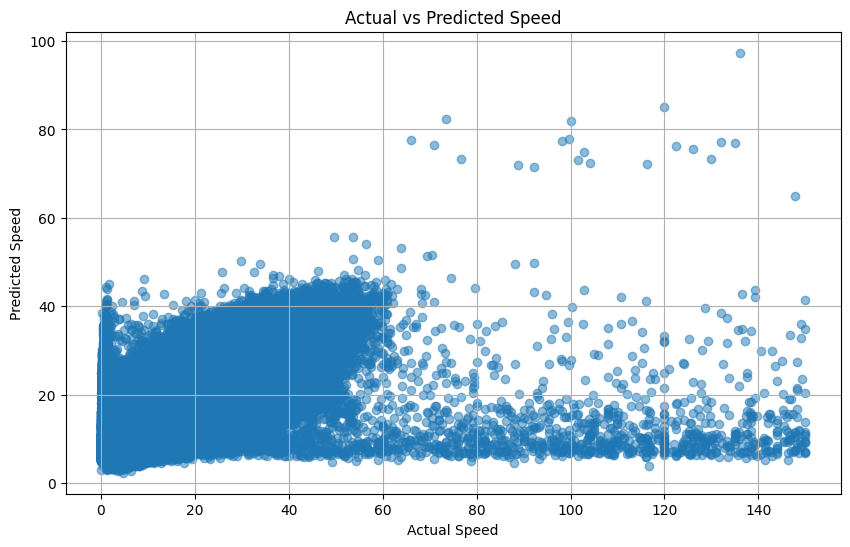

In [11]:
import matplotlib.pyplot as plt

# Plotting actual vs predicted values
plt.figure(figsize=(10, 6))
plt.scatter(Y_test, predictions, alpha=0.5)
plt.xlabel('Actual Speed')
plt.ylabel('Predicted Speed')
plt.title('Actual vs Predicted Speed')
plt.grid(True)
plt.show()
